In [12]:
import tensorflow as tf
from tensorflow import keras
import os
import numpy as np
from matplotlib import pyplot as plt
from PIL import Image

# Initialise random number generators.
seed = 0
np.random.seed(seed)
tf.set_random_seed(seed)

In [10]:
model = tf.keras.models.load_model(filepath = "digit_recognition_network")

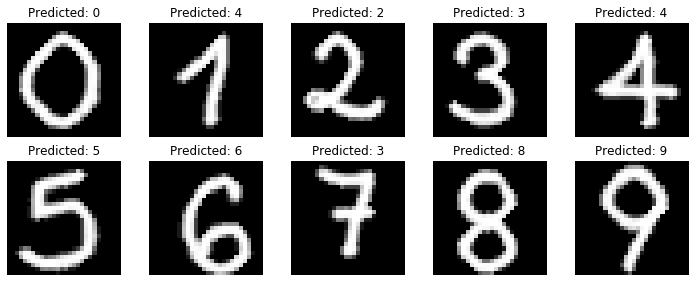

In [44]:
prefix = "digits/"
suffix = ".png"
digits = [str(d) for d in range(10)]
img_width = 28
img_height = 28

fig, axes = plt.subplots(nrows = 2, ncols = 5, figsize = (2 * 5, 2 * 2))
axes = axes.flatten()

for d_count, digit in zip(range(10), digits):
    filename = prefix + digit + suffix
    digit_image = Image.open(filename).convert('L')

    ydim, xdim = digit_image.size
    pix = digit_image.load()
    data = np.zeros((xdim, ydim))
    # pix is not a np array, so I cannot
    # just write data = pix.T
    for j in range(ydim):
        for i in range(xdim):
            data[i,j] = pix[j,i]

    # Rescale the data from [0, 255] to [0, 1].
    data /= 255
    axes[d_count].imshow(data, cmap = "gray")

    # Reshape the input data.
    # The first argument for "reshape" is the number of samples,
    # so here it is just 1. See exercise 12.2 notebook.
    if keras.backend.image_data_format() == "channels_first":
        data = data.reshape(1, 1, img_width, img_height)
    else:
        data = data.reshape(1, img_width, img_height, 1)
    
    axes[d_count].axis("off")
    axes[d_count].set_title("Predicted: " + str(np.argmax(model.predict(data))))

fig.tight_layout()
plt.show()

It didn't go really well. I guess the reason is - as can be seen in the previous notebook - my handwriting may be different from the typical shape of the digits of the input data in the MNIST database (right in correspondence with the digits it failed to recognise).
It would say that the network f*ailed to generalise* the MNIST data.